<a href="https://colab.research.google.com/github/zubaidak/Summer-Microcredential-Data-Analytics-/blob/main/Iris_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem

In this notebook, we will conduct a detailed analysis to the iris dataset to classify the class of iris based on sepal length, sepal width, petal length, and petal width.


# Task 2: Load the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

# Task 3: Load the Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/zubaidak/ML-data/main/iris.csv')

# Task 4: EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
df.isnull().value_counts()

Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
False         False        False         False        False    150
dtype: int64

In [ ]:
df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

# Task 5: Data Visualization

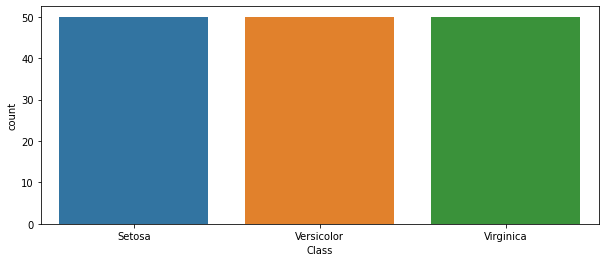

In [ ]:
plt.figure(figsize = (10, 4))
sns.countplot(x = 'Class', data = df)
# this countplot shows the difference of each class

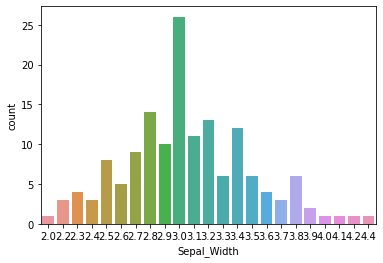

In [ ]:
sns.countplot(x='Sepal_Width', data = df)
# this countplot shows Sepal width and there is one outlying value which is 3.0 with the highest

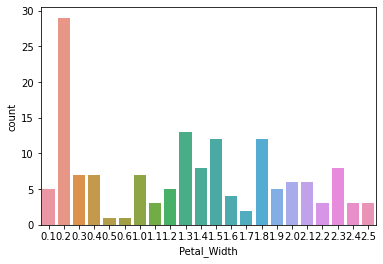

In [ ]:
sns.countplot(x='Petal_Width', data=df)
# count plot of petal width
# comparing petal width to sepal width, there is a large difference in trends

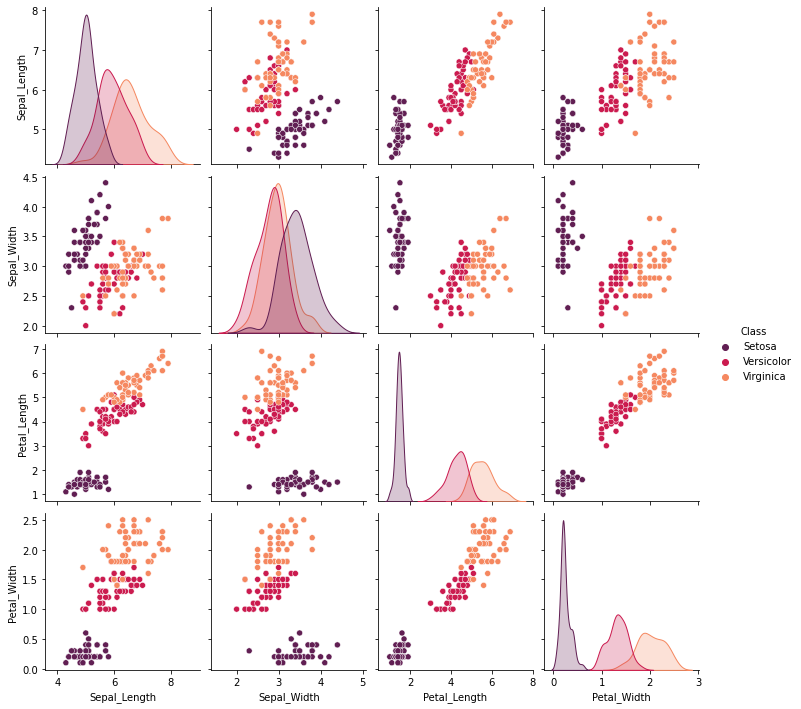

In [ ]:
sns.pairplot(df, hue='Class', palette = 'rocket')
# this pairplot shows all 3 classes and it can be seen that there is not much over lapping 
# especially the scatterplots which show large discrepencies

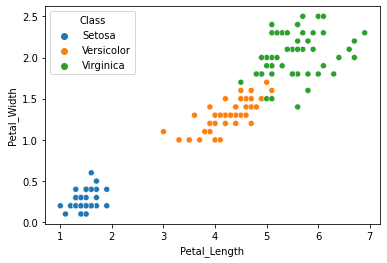

In [ ]:
sns.scatterplot(x="Petal_Length", y="Petal_Width", hue="Class", data=df)
# this scartter plot focusing on petal length vs petal width clearly shows the large difference between class, very little overlapping again

# Task 6: Train, Test Split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df)

StandardScaler()

In [ ]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('Class', axis = 1))

In [ ]:
df['Class'] = df['Class'].replace(['Setosa'],'1')
df['Class'] = df['Class'].replace(['Versicolor'], '2')
df['Class'] = df['Class'].replace('Virginica', '3')
# we need to change 'Class' from string to values 

In [ ]:
scaled_features

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
dataset_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
dataset_feat.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
from sklearn.model_selection import train_test_split
# import testing model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_feat, df['Class'], test_size = 0.30)
# creating the testing size

# Task 7: Logistic Regression

In [ ]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
# import the libraries needed for logistic regression

In [ ]:
label = preprocessing.LabelEncoder()
label.fit(df['Class'])

LabelEncoder()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_feat, df['Class'], test_size = 0.30, random_state = 0)
# enter the testing data

In [ ]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
# enter the logistic model to fit our training data of 0.3

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
# make and print the prediction of the test data

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      0.94      0.97        18
           3       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
confusion_matrix(y_test, predictions)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

Split data pt 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset_feat, df['Class'], test_size = 0.4, random_state = 0)


In [ ]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.85      1.00      0.92        23
           3       1.00      0.81      0.89        21

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



In [ ]:
# we can see that the accuracy decreases as the test data was increased

In [ ]:
confusion_matrix(y_test, predictions)

array([[16,  0,  0],
       [ 0, 23,  0],
       [ 0,  4, 17]])

# Task 8: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# import the knn library and create the knn variable to be equal to it

In [ ]:
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.88      0.96      0.92        23
           3       0.95      0.86      0.90        21

    accuracy                           0.93        60
   macro avg       0.94      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

# Import the library model selection to help print out the accuracy for our model
# print out both the accuracy and standard deviation in percentage

Accuracy: 97.78 %
Standard Deviation: 4.44 %


In [ ]:
error_rate = []



for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

[0.06666666666666667,
 0.15,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.08333333333333333,
 0.06666666666666667,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.1,
 0.08333333333333333,
 0.11666666666666667,
 0.15,
 0.15,
 0.2,
 0.16666666666666666,
 0.2,
 0.2,
 0.2,
 0.21666666666666667,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.21666666666666667,
 0.21666666666666667,
 0.21666666666666667,
 0.21666666666666667,
 0.21666666666666667,
 0.21666666666666667,
 0.2,
 0.21666666666666667,
 0.21666666666666667]

Text(0, 0.5, 'Error Rate')

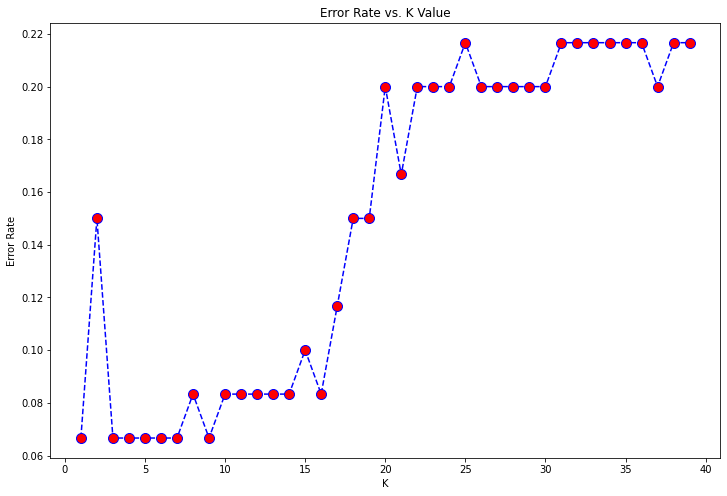

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title ('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# graph of the error rate 

Now lets test with 2 neighbors

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn2.fit(X_train, y_train)
pred = knn2.predict(X_test)

In [ ]:
print('With K = 2')
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

With K = 2
[[16  0  0]
 [ 0 22  1]
 [ 0  8 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       0.73      0.96      0.83        23
           3       0.93      0.62      0.74        21

    accuracy                           0.85        60
   macro avg       0.89      0.86      0.86        60
weighted avg       0.87      0.85      0.84        60



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
# 

Accuracy: 96.67 %
Standard Deviation: 5.09 %


We can compare when knn neighbors is 1 and 2 and see that when the neighbors was 1, the accuracy was 97.78% and when the nighbors is 2 the accuracy is 96.67%. This shows that the accuracy went down as the k value increased.

Overall, from this dataset of Iris's, it is evident that the different classes are very distinguished from each other. It can also be seen clearly in the visual graphs like for example the scatter plot there are barely any intersections. Another interesting finding from this dataset is how high the accuracy rate was while calculating test models. 